In [17]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

In [18]:
non_perturbed_deck = 'standard'
decks = [
    'batman_joker',
    'captain_america',
    'adversarial_standard',
    'adversarial_batman_joker',
    'adversarial_captain_america'
] 
noise_pcts = [10,20,30,40,50,60,70,80,90,95,96,97,98,99,100]
FONT_SIZE=14
TICK_FONT_SIZE=14
mpl.rcParams['xtick.labelsize'] = TICK_FONT_SIZE
mpl.rcParams['ytick.labelsize'] = TICK_FONT_SIZE

In [19]:
def get_weight_penalty_ratios(net_type, dataset, key='correct', ext=''):
    def format_pct(x):
        return math.floor(x*100)
    ratios = []
    std_errs = []
    
    # get standard
    std_ratios = json.loads(open('../weight_penalty_ratios/'+net_type+'/standard'+ext+'.json').read())
    ratios.append(format_pct(std_ratios['noise_pct_0'][key]['mean_penalty_ratio']))
    std_errs.append(std_ratios['noise_pct_0'][key]['std_err'])
    pct_ratios = json.loads(open('../weight_penalty_ratios/'+net_type+'/'+dataset+ext+'.json').read())
    for n in noise_pcts:
        ratios.append(format_pct(pct_ratios['noise_pct_'+str(n)][key]['mean_penalty_ratio']))
        std_errs.append(pct_ratios['noise_pct_'+str(n)][key]['std_err']*100)
    return ratios, std_errs

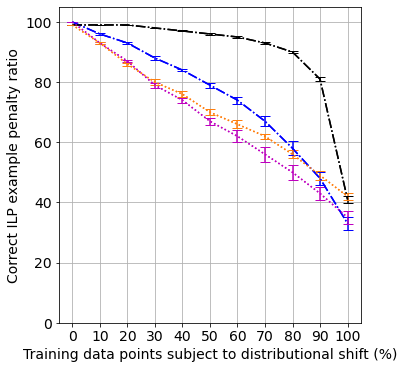

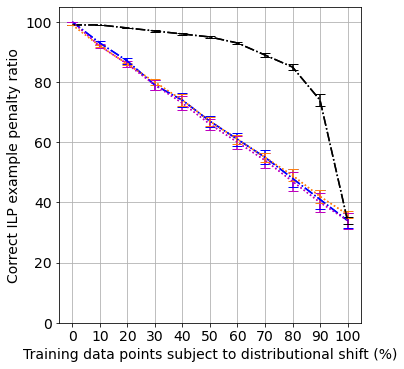

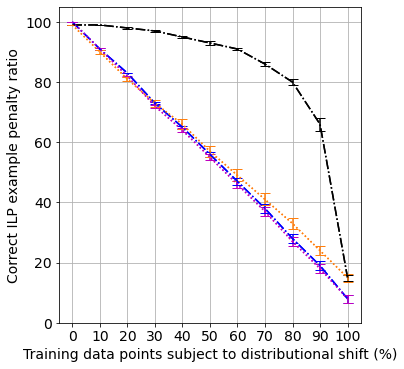

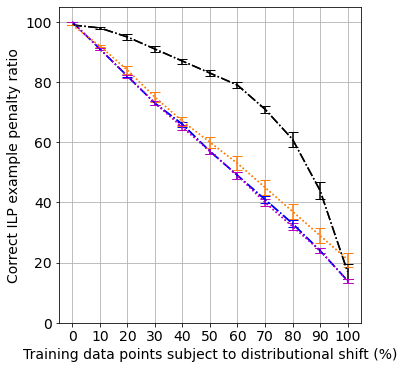

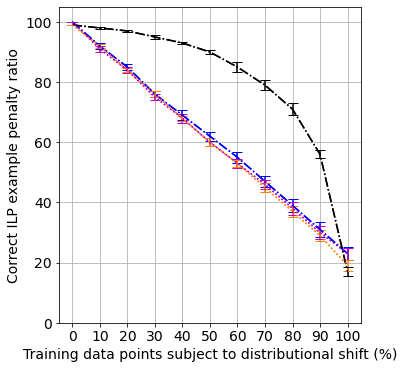

In [21]:
# fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
# spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
# f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])
# f2_ax3 = fig2.add_subplot(spec2[0, 2])
# f2_ax4 = fig2.add_subplot(spec2[1, 0])
# f2_ax5 = fig2.add_subplot(spec2[1, 1])
# f2_ax6 = fig2.add_subplot(spec2[1, 2])

# axes = [f2_ax1, f2_ax2, f2_ax3, f2_ax4, f2_ax5]
noise_pcts = [10,20,30,40,50,60,70,80,90,100]
nps_x = [0]+noise_pcts
for i in range(5):
    fig2 = plt.figure(constrained_layout=True, figsize=(5,5))
    axes = plt.gca()
    # Softmax
    softmax_ratios, softmax_err = get_weight_penalty_ratios('softmax', decks[i])
    axes.plot(nps_x, softmax_ratios, label = "FFNSL Softmax (with NN penalties)", color="b", linestyle='-.')
    axes.errorbar(nps_x, softmax_ratios, yerr=softmax_err, color="b", capsize=5,linestyle='-.')
    
    # EDL-GEN
    edl_gen_ratios, edl_gen_err = get_weight_penalty_ratios('edl_gen', decks[i])
    axes.plot(nps_x, edl_gen_ratios, label = "FFNSL EDL-GEN (with NN penalties)", color="k", linestyle='-.')
    axes.errorbar(nps_x, edl_gen_ratios, yerr=edl_gen_err, color="k", capsize=5,linestyle='-.')
        
    # Constant
    constant_ratios, constant_err = get_weight_penalty_ratios('softmax', decks[i], 'constant_correct')
    axes.plot(nps_x, constant_ratios, label = "FFNSL Softmax (with constant penalties)", color="m", linestyle=':')
    axes.errorbar(nps_x, constant_ratios, yerr=constant_err, color="m", capsize=5,linestyle=':')
    
    constant_ratios, constant_err = get_weight_penalty_ratios('edl_gen', decks[i], 'constant_correct')
    axes.plot(nps_x, constant_ratios, label = "FFNSL EDL-GEN (with constant penalties)", color="tab:orange", linestyle=':')
    axes.errorbar(nps_x, constant_ratios, yerr=constant_err, color="tab:orange", capsize=5,linestyle=':')
    
    
    
    axes.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes.set_xlabel('Training data points subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes.set_ylabel('Correct ILP example penalty ratio', fontsize=FONT_SIZE)
    axes.grid(True)
#     axes[i].set_title(decks[i])
    legend = axes.legend(bbox_to_anchor=(1.05, 1.25), fontsize=9,ncol=2, borderaxespad=0, )
    
    def export_legend(legend, filename="follow_suit_nn_penalties_legend.pdf", expand=[-5,-5,5,5]):
        fig  = legend.figure
        fig.canvas.draw()
        bbox  = legend.get_window_extent()
        bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
        bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
        fig.savefig(filename, dpi="figure", bbox_inches=bbox, format='pdf')
        
#     if i == 0:
#         export_legend(legend)
    axes.get_legend().remove()
    axes.set_ylim([0,105])

    plt.savefig('weight_penalty_ratio/'+decks[i]+'_weight_penalty_ratio_0_100_results.pdf', format='pdf', bbox_inches='tight')
    

# Legend
# f2_ax6.legend(*axes[0].get_legend_handles_labels(), loc='center')
# f2_ax6.get_xaxis().set_visible(False)
# f2_ax6.get_yaxis().set_visible(False)
# f2_ax6.set_title('Legend')
    
# plt.show()

# 95-100%

In [7]:
def get_pct_symbolic_perturbs(net_type, deck, test_set=False):
    def format_pct(x):
        return math.floor(x*100)
    pcts = []
    if test_set:
        file_name_add = '_test_set_more_repeats'
    else:
        file_name_add = '_more_repeats'
    pct_symbolic_perturbs = json.loads(open('../mislabelled_example_analysis/'+net_type+'/'+deck+file_name_add+'.json').read())
    noise_pcts = [95,96,97,98,99,100]
    for n in noise_pcts:
        pcts.append(format_pct(pct_symbolic_perturbs['noise_pct_'+str(n)]['pct_incorrect_examples']))
    return pcts

In [8]:
def get_weight_penalty_ratios_95_100(net_type, dataset, key='correct'):
    def format_pct(x):
        return math.floor(x*100)
    ratios = []
    std_errs = []
    noise_pcts = [95,96,97,98,99,100]
    
    pct_ratios = json.loads(open('../weight_penalty_ratios/'+net_type+'/'+dataset+'_more_repeats.json').read())
    for n in noise_pcts:
        ratios.append(format_pct(pct_ratios['noise_pct_'+str(n)][key]['mean_penalty_ratio']))
        std_errs.append(pct_ratios['noise_pct_'+str(n)][key]['std_err']*100)
    return ratios, std_errs

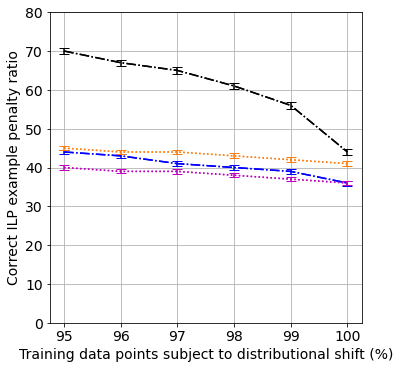

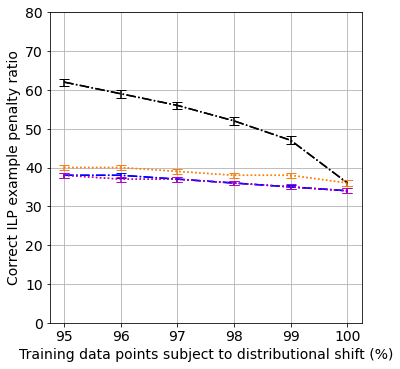

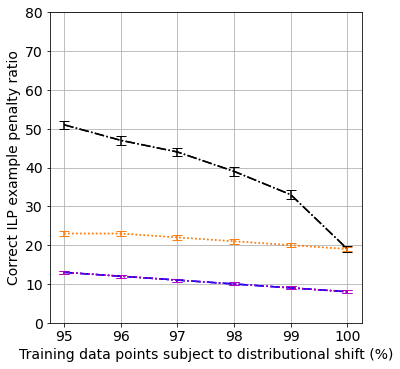

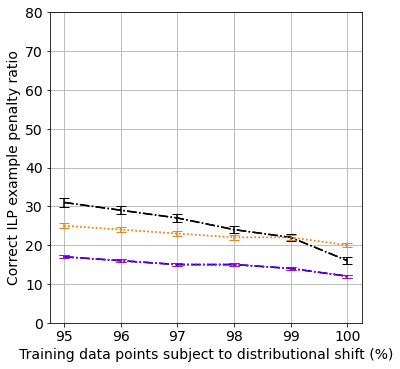

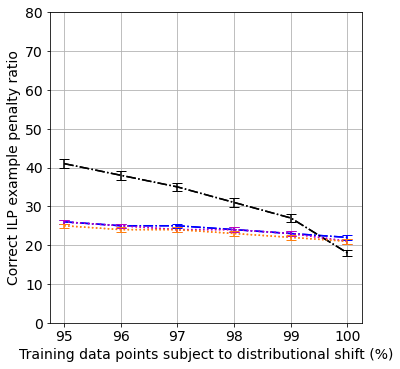

In [16]:
# fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
# spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
# f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])
# f2_ax3 = fig2.add_subplot(spec2[0, 2])
# f2_ax4 = fig2.add_subplot(spec2[1, 0])
# f2_ax5 = fig2.add_subplot(spec2[1, 1])
# f2_ax6 = fig2.add_subplot(spec2[1, 2])

# axes = [f2_ax1, f2_ax2, f2_ax3, f2_ax4, f2_ax5]

nps_x = [95,96,97,98,99,100]
for i in range(5):
    fig2 = plt.figure(constrained_layout=True, figsize=(5,5))
    axes = plt.gca()
    # Softmax
    softmax_ratios, softmax_err = get_weight_penalty_ratios_95_100('softmax', decks[i])
    axes.plot(nps_x, softmax_ratios, label = "Softmax preds and penalty", color="b", linestyle='-.')
    axes.errorbar(nps_x, softmax_ratios, yerr=softmax_err, color="b", capsize=5,linestyle='-.')
    
    # EDL-GEN
    edl_gen_ratios, edl_gen_err = get_weight_penalty_ratios_95_100('edl_gen', decks[i])
    axes.plot(nps_x, edl_gen_ratios, label = "EDL-GEN preds and penalty", color="k", linestyle='-.')
    axes.errorbar(nps_x, edl_gen_ratios, yerr=edl_gen_err, color="k", capsize=5,linestyle='-.')
        
    # Constant
    constant_ratios, constant_err = get_weight_penalty_ratios_95_100('softmax', decks[i], 'constant_correct')
    axes.plot(nps_x, constant_ratios, label = "Softmax preds and constant penalty", color="m", linestyle=':')
    axes.errorbar(nps_x, constant_ratios, yerr=constant_err, color="m", capsize=5,linestyle=':')
    
    constant_ratios, constant_err = get_weight_penalty_ratios_95_100('edl_gen', decks[i], 'constant_correct')
    axes.plot(nps_x, constant_ratios, label = "EDL-GEN preds and constant penalty", color="tab:orange", linestyle=':')
    axes.errorbar(nps_x, constant_ratios, yerr=constant_err, color="tab:orange", capsize=5,linestyle=':')
    
#     pct_symbolic_perturbs_softmax = get_pct_symbolic_perturbs('softmax', decks[i])
#     pct_symbolic_perturbs_edl_gen = get_pct_symbolic_perturbs('edl_gen', decks[i])
#     ax2 = axes.twiny()
#     ax2.set_xticks(nps_x)
#     ax2.set_xticklabels(pct_symbolic_perturbs_softmax)
#     ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax2.spines['bottom'].set_position(('outward', 45))
#     ax2.set_xlabel('Incorrect generated ILP examples, FF-NSL Softmax (%)', fontsize=FONT_SIZE)
#     ax2.set_xlim(axes.get_xlim())
    
#     ax3 = axes.twiny()
#     ax3.set_xticks(nps_x)
#     ax3.set_xticklabels(pct_symbolic_perturbs_edl_gen)
#     ax3.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax3.spines['bottom'].set_position(('outward', 90))
#     ax3.set_xlabel('Incorrect generated ILP examples, FF-NSL EDL-GEN (%)', fontsize=FONT_SIZE)
#     ax3.set_xlim(axes.get_xlim())
    
    axes.set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes.set_xlabel('Training data points subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes.set_ylabel('Correct ILP example penalty ratio', fontsize=FONT_SIZE)
    axes.grid(True)
    axes.set_ylim([0,80])
#     axes.set_title(decks[i])
    plt.savefig('weight_penalty_ratio/'+decks[i]+'_weight_penalty_ratio_95_100_results.pdf', format='pdf', bbox_inches='tight')


# Legend
# f2_ax6.legend(*axes[0].get_legend_handles_labels(), loc='center')
# f2_ax6.get_xaxis().set_visible(False)
# f2_ax6.get_yaxis().set_visible(False)
# f2_ax6.set_title('Legend')
    
plt.show()

# Experiment with polynomial fit

In [41]:
from scipy.interpolate import interp1d
from numpy.polynomial import Polynomial

In [9]:
edl_gen_ratios, edl_gen_err = get_weight_penalty_ratios('edl_gen', decks[0])
print(edl_gen_ratios)
z = interp1d([0]+noise_pcts, edl_gen_ratios, kind='cubic')
z(80)

[99, 99, 99, 99, 98, 98, 97, 95, 93, 86, 75, 72, 69, 64, 58, 40]


array(93.)

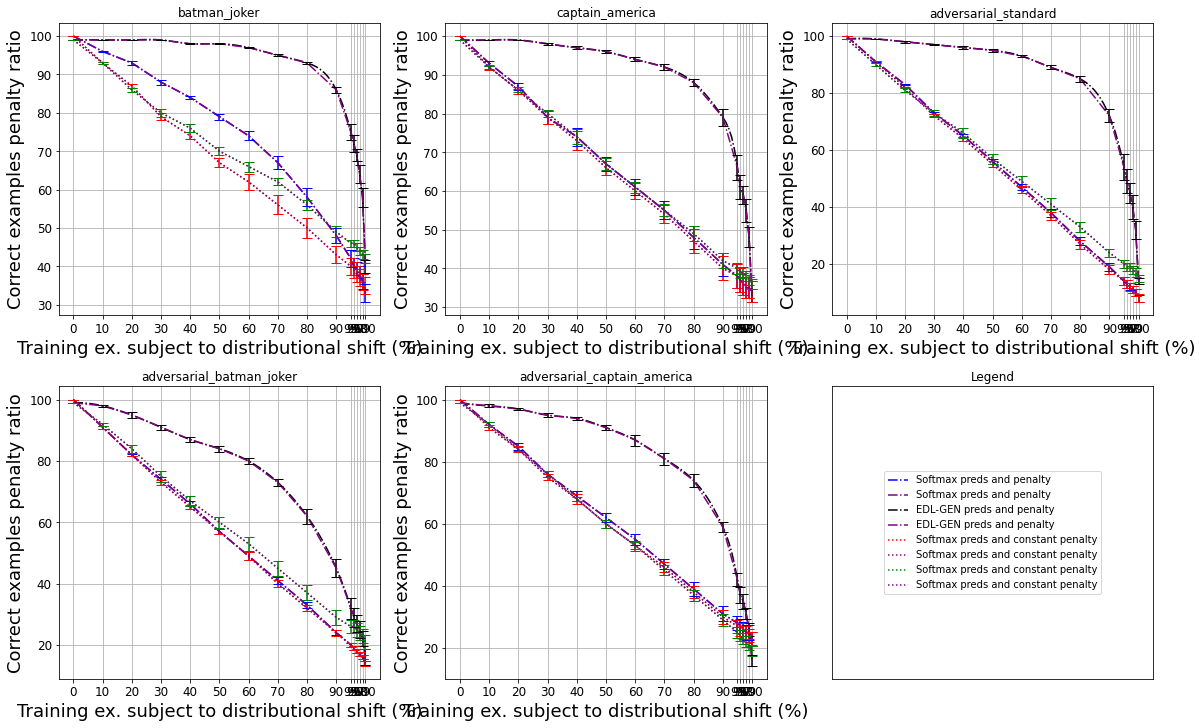

In [37]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[0, 2])
f2_ax4 = fig2.add_subplot(spec2[1, 0])
f2_ax5 = fig2.add_subplot(spec2[1, 1])
f2_ax6 = fig2.add_subplot(spec2[1, 2])

axes = [f2_ax1, f2_ax2, f2_ax3, f2_ax4, f2_ax5]


def plot_line(net, constant, title, deck, color, linestyle):
    nps_x = [0] + noise_pcts
    if constant:
        ratios, err = get_weight_penalty_ratios(net, deck, 'constant_correct')
    else:
        ratios, err = get_weight_penalty_ratios(net, deck)
        
    z = interp1d(nps_x, ratios)
    if net == 'edl_gen' and not constant:
        z = interp1d(nps_x, ratios, kind='cubic')
        
    x_points = list(range(0,101))
    y_points = [z(x) for x in x_points]
    error_y_points = [z(x) for x in nps_x]
    axes[i].plot(x_points, y_points, label = title, color=color, linestyle=linestyle)
    axes[i].plot(nps_x, ratios, label = title, color='purple', linestyle=linestyle)
    axes[i].errorbar(nps_x, error_y_points, yerr=err, color=color, capsize=5,linestyle='')
    
nps_x = [0]+noise_pcts
for i in range(5):
    plot_line('softmax', False, 'Softmax preds and penalty', decks[i], 'b', '-.')
    plot_line('edl_gen', False, 'EDL-GEN preds and penalty', decks[i], 'k', '-.')
    plot_line('softmax', True, 'Softmax preds and constant penalty', decks[i], 'r', ':')
    plot_line('edl_gen', True, 'Softmax preds and constant penalty', decks[i], 'g', ':')
           
    
    axes[i].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[i].set_xlabel('Training ex. subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Correct examples penalty ratio', fontsize=FONT_SIZE)
    axes[i].grid(True)
    axes[i].set_title(decks[i])

# Legend
f2_ax6.legend(*axes[0].get_legend_handles_labels(), loc='center')
f2_ax6.get_xaxis().set_visible(False)
f2_ax6.get_yaxis().set_visible(False)
f2_ax6.set_title('Legend')
    
plt.show()

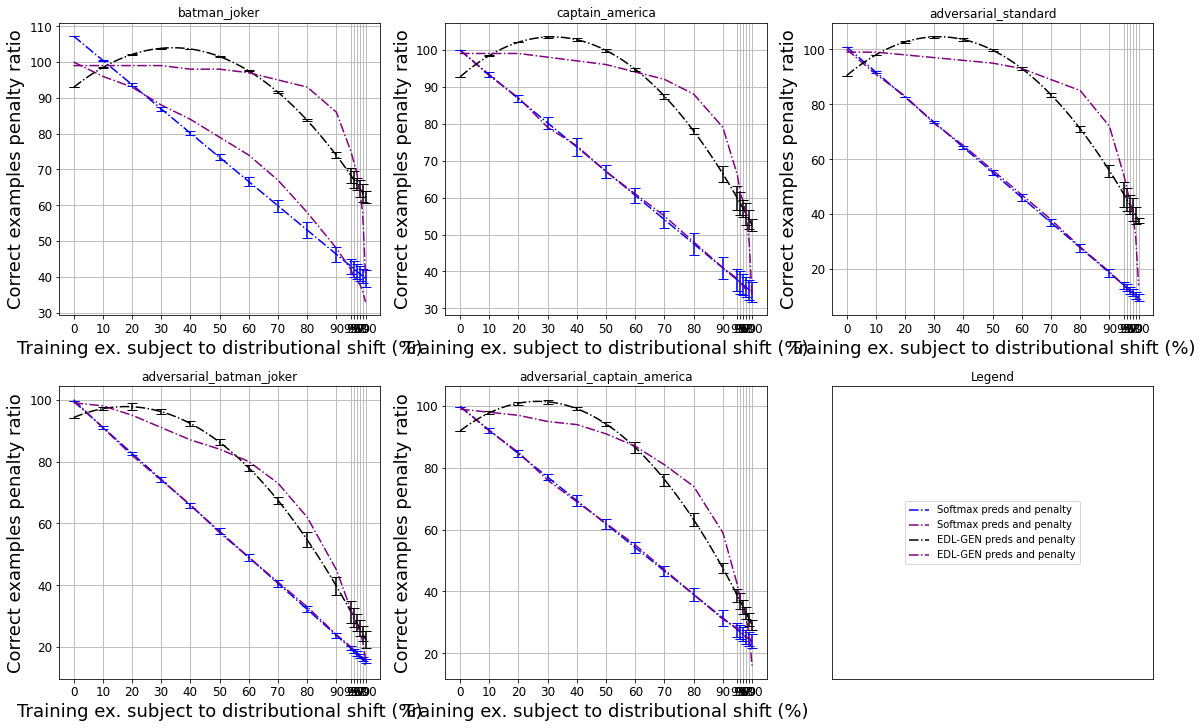

In [49]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[0, 2])
f2_ax4 = fig2.add_subplot(spec2[1, 0])
f2_ax5 = fig2.add_subplot(spec2[1, 1])
f2_ax6 = fig2.add_subplot(spec2[1, 2])

axes = [f2_ax1, f2_ax2, f2_ax3, f2_ax4, f2_ax5]


def plot_line(net, constant, title, deck, color, linestyle):
    nps_x = [0] + noise_pcts
    if constant:
        ratios, err = get_weight_penalty_ratios(net, deck, 'constant_correct')
    else:
        ratios, err = get_weight_penalty_ratios(net, deck)
        
    z = Polynomial.fit(nps_x, ratios, deg=1)
    if net == 'edl_gen' and not constant:
        z = Polynomial.fit(nps_x, ratios, deg=2)
        
    x_points = list(range(0,101))
    y_points = [z(x) for x in x_points]
    error_y_points = [z(x) for x in nps_x]
    axes[i].plot(x_points, y_points, label = title, color=color, linestyle=linestyle)
    axes[i].plot(nps_x, ratios, label = title, color='purple', linestyle=linestyle)
    axes[i].errorbar(nps_x, error_y_points, yerr=err, color=color, capsize=5,linestyle='')
    
nps_x = [0]+noise_pcts
for i in range(5):
    plot_line('softmax', False, 'Softmax preds and penalty', decks[i], 'b', '-.')
    plot_line('edl_gen', False, 'EDL-GEN preds and penalty', decks[i], 'k', '-.')
#     plot_line('softmax', True, 'Softmax preds and constant penalty', decks[i], 'r', ':')
#     plot_line('edl_gen', True, 'Softmax preds and constant penalty', decks[i], 'g', ':')
           
    
    axes[i].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[i].set_xlabel('Training ex. subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Correct examples penalty ratio', fontsize=FONT_SIZE)
    axes[i].grid(True)
    axes[i].set_title(decks[i])

# Legend
f2_ax6.legend(*axes[0].get_legend_handles_labels(), loc='center')
f2_ax6.get_xaxis().set_visible(False)
f2_ax6.get_yaxis().set_visible(False)
f2_ax6.set_title('Legend')
    
plt.show()